In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
hojas = ['huambo_2019','Machahuay_2019','Chivay_2019','Santa_Lucia_2019','Majes_2019','Aplao_2019','Chuquibamba_2019','Pampacolca_2019','Huanca_2019','Cabanaconde_2019','Caylloma_2019']

Pipeline de procesamiento de datos

* Leemos todas las hojas del excel y le damos un formato de un solo nivel
* Cambio el nombre de las columnas
* Eliminamos las columnas que no utilizaremos, en este caso solo utilizaré las columnas de precipitación




In [ ]:
xls = pd.ExcelFile('/content/pp anual.xlsx')
nombres = xls.sheet_names
for i in nombres:
  globals()[i] = pd.read_excel(xls, sheet_name=i,header = [0,1,2])
  globals()[i].columns = globals()[i].columns.droplevel([0,1])
  globals()[i].columns = ['Fecha','Temp.maxima','Temp.minima','Temp.seco7','Temp.seco13','Temp.seco19','Temp.humedo7','Temp.humedo13','Temp.humedo19','pre.7','pre.9','direccion_viento','velocidad_viento']
  for col in ['Temp.maxima','Temp.minima','Temp.seco7','Temp.seco13','Temp.seco19','Temp.humedo7','Temp.humedo13','Temp.humedo19','direccion_viento','velocidad_viento']:
    del globals()[i][col]#para los fines de estudio solo queremos los datos de precipitacion


Análizamos los valores de precipitación, para identificar valores negativos o lugares donde no hay data

In [ ]:
tisco_2019

,Fecha,pre.7,pre.9
0,2019-01-01,0.0,1.6
1,2019-01-02,0.0,0.1
2,2019-01-03,5.3,0.6
3,2019-01-04,0.0,-888.0
4,2019-01-05,0.0,-888.0
...,...,...,...
360,2019-12-27,0.0,0.0
361,2019-12-28,0.0,0.0
362,2019-12-29,0.0,0.0
363,2019-12-30,0.0,0.0


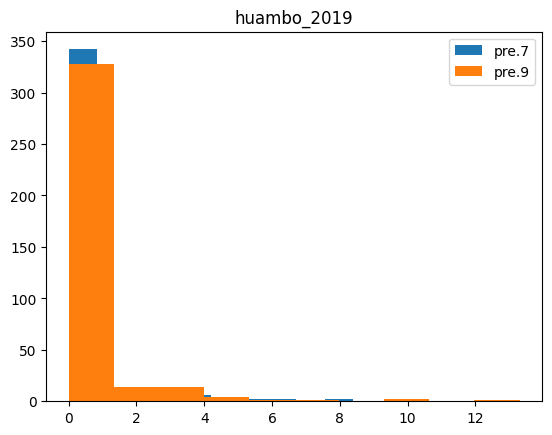

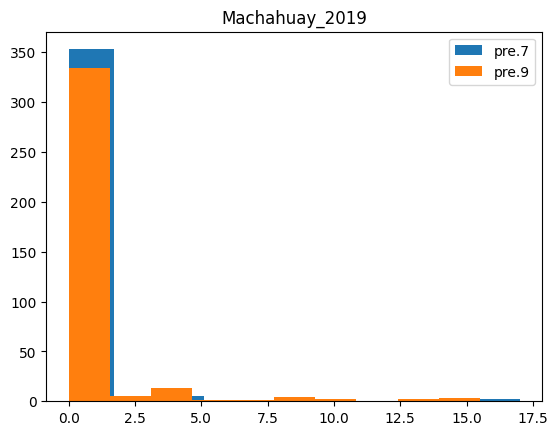

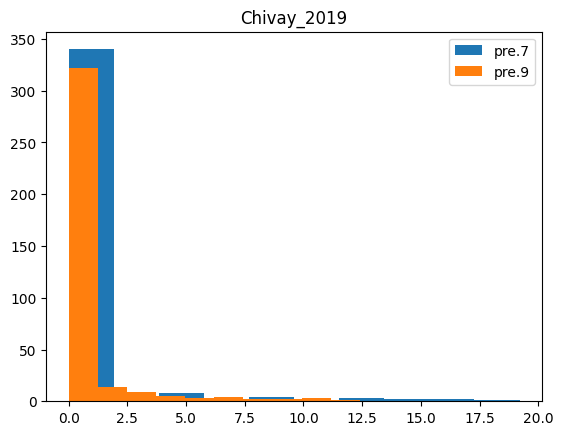

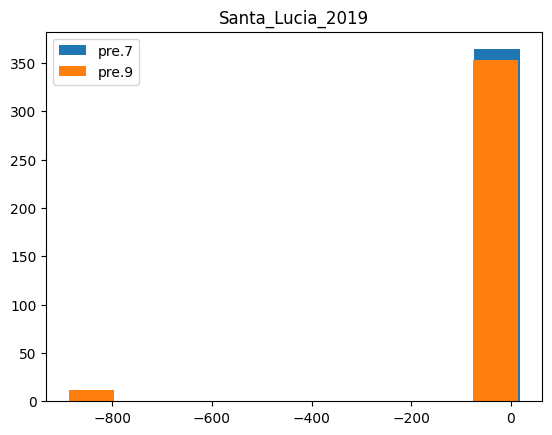

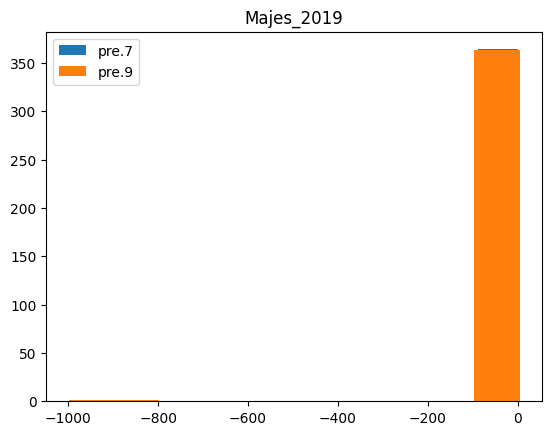

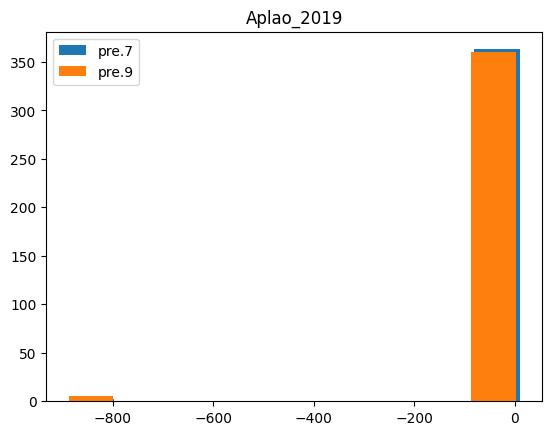

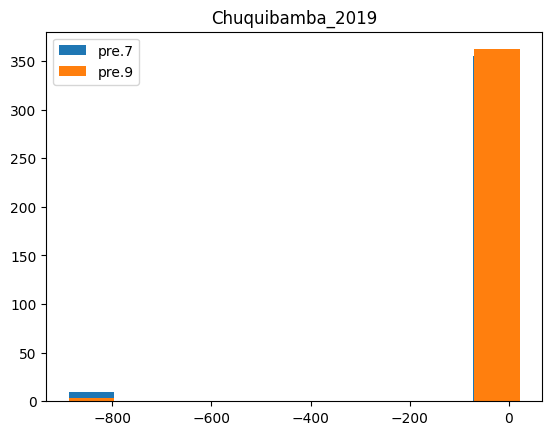

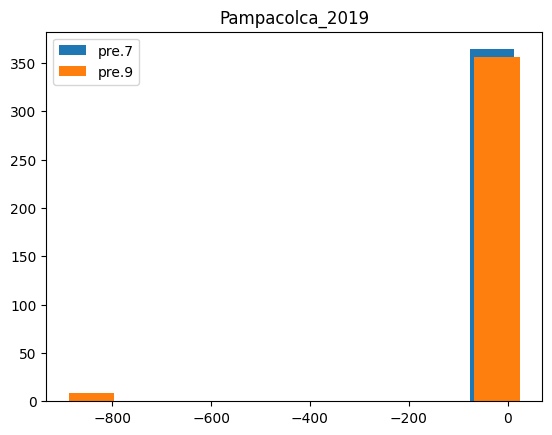

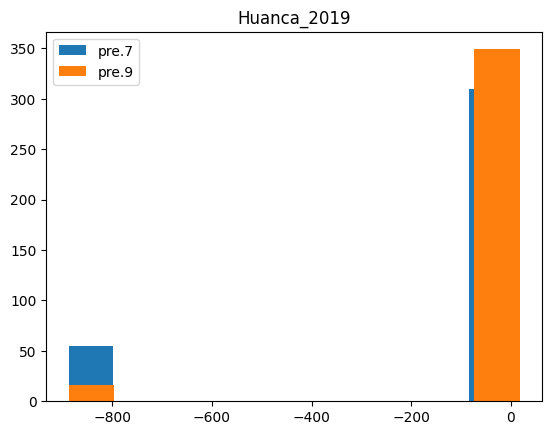

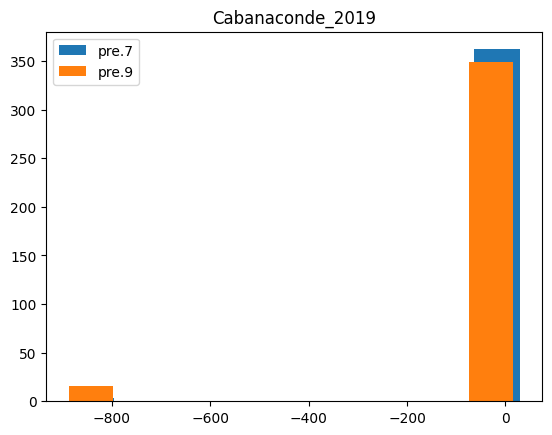

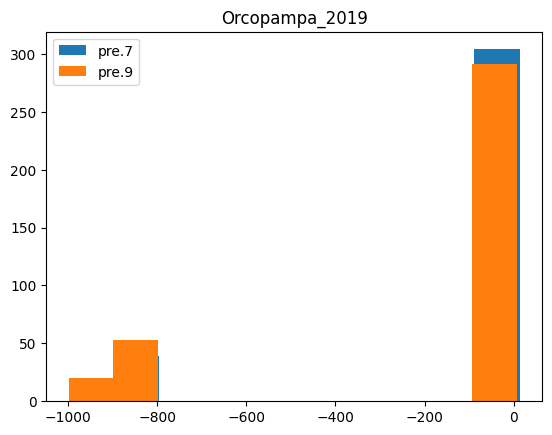

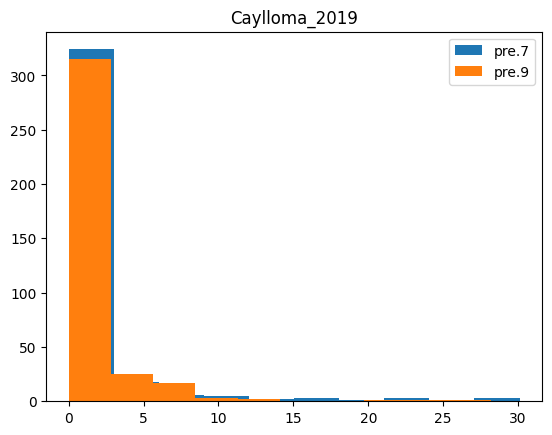

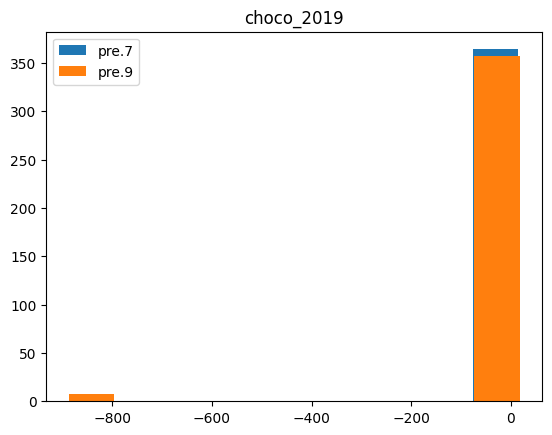

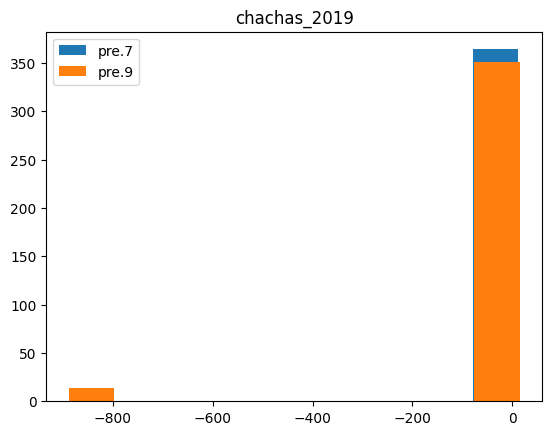

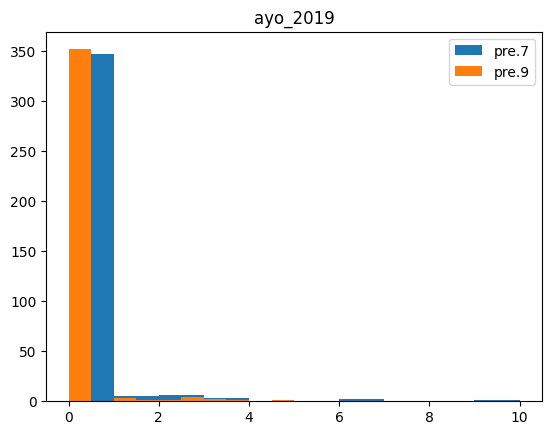

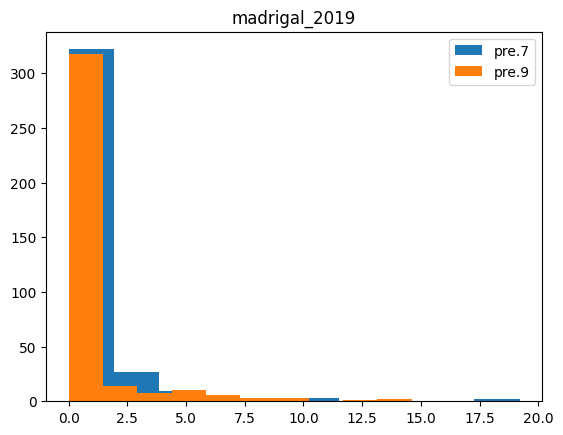

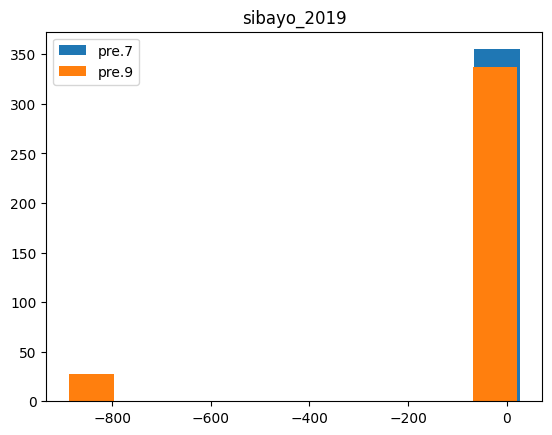

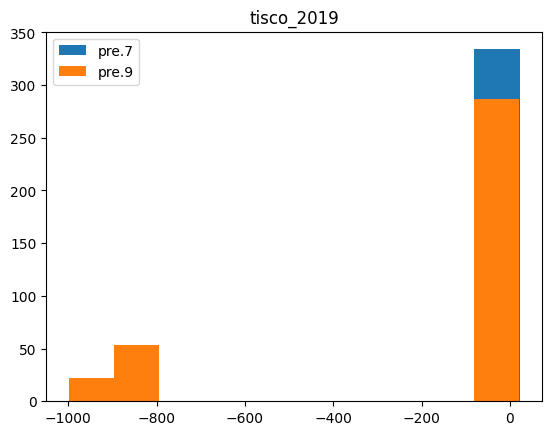

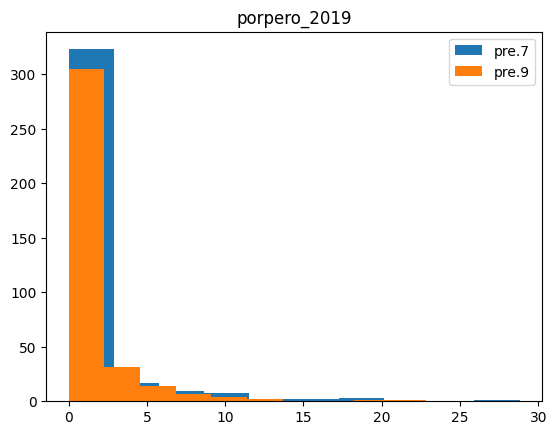

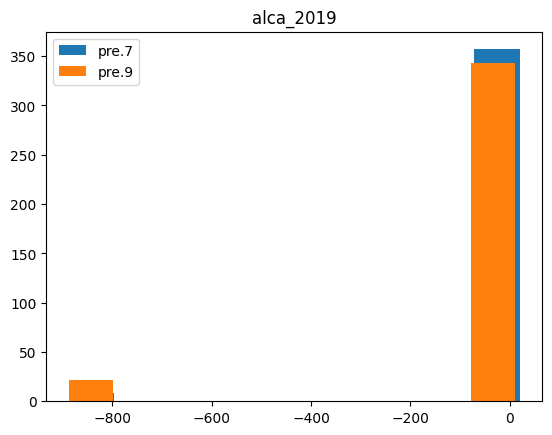

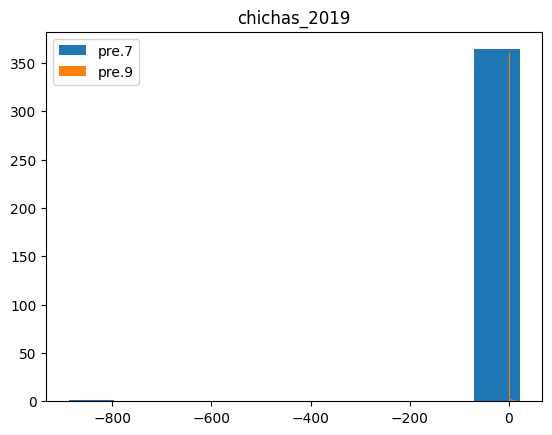

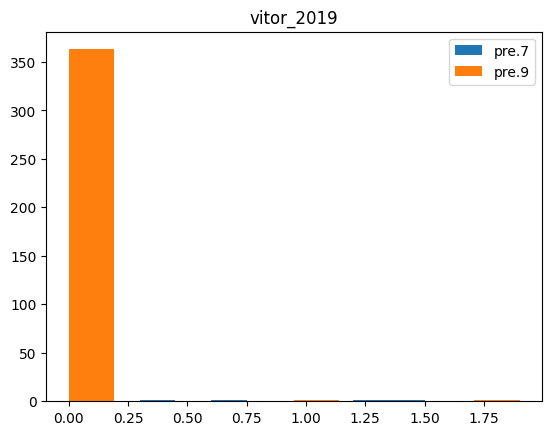

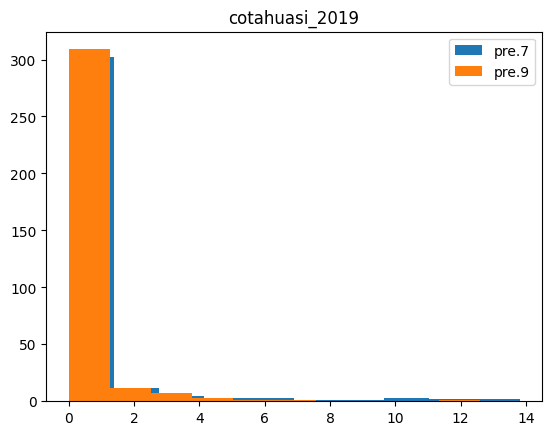

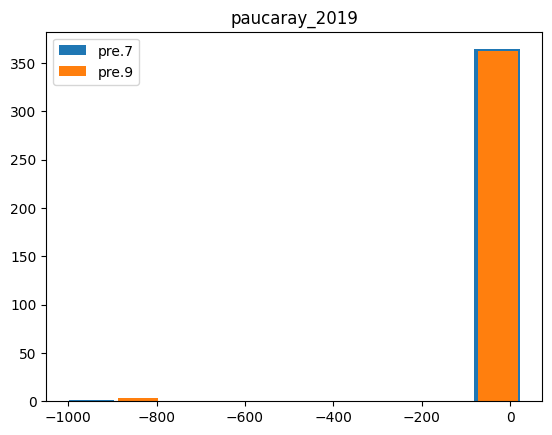

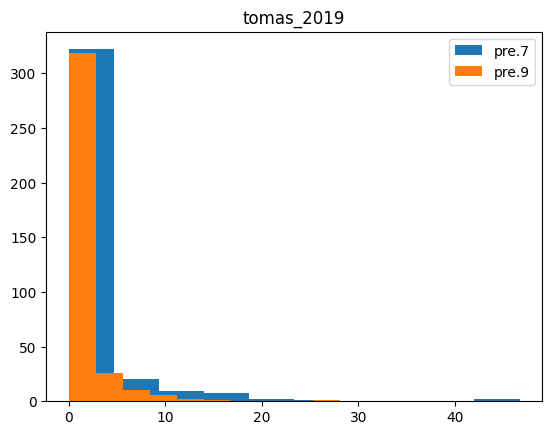

In [ ]:
#analizamos las columnas de pre.7 y pre.9
for i in nombres:
  plt.hist(globals()[i]['pre.7'], label='pre.7')
  plt.hist(globals()[i]['pre.9'], label='pre.9')
  plt.title(i)
  plt.legend()
  plt.show()
#podemos notar que hay numeros negativos, por lo cual debemos reemplazarlos por cero, ya que son espacios donde no se encuentran datos

Tambien podemos determinar los outliers de los dataframes

In [ ]:
#outliers en los datos de precipitacion según el nombre de la estación
q1 = np.percentile(chichas_2019['pre.7'],25)
q3 = np.percentile(chichas_2019['pre.7'],75)
iqr = q3 - q1

limite_inferior = q1 -1.5*iqr
limite_superior = q3 +1.5*iqr

outliers = [x for x in chichas_2019['pre.7'] if x < limite_inferior or x > limite_superior]

In [ ]:
outliers

Reemplazamos los datos negativos por cero

In [ ]:
columnas = ['pre.7','pre.9']
for i in nombres:
  for x in columnas:
    globals()[i][x][globals()[i][x] < 0 ] = 0
    #globals()[i][x] = globals()[i][x].replace(to_replace = lambda x: x<0 , value = 0)


<ipython-input-3-709b5b7715e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[i][x][globals()[i][x] < 0 ] = 0


**Suma de los datos de precipitación**:

Creamos una nueva columna llamada 'pp_diaria', la cual contiene la suma de la precipitacion hasta las 7:00 am y la precipitación hasta las 19:00 pm, tdo esto estara dentro de un diccionario llamado result

In [ ]:
result = {}
for i in nombres:
  globals()[i]['pp_diaria'] = globals()[i]['pre.7'] + globals()[i]['pre.9']
  result[i] = globals()[i]['pp_diaria'].sum(min_count=1).round(2)
  #con min_count especificamos el minimo de valores no nulos para realizar la suma en este caso1
  #eso quiere decir que si al menos uno de los componentes de la suma no es un valor nulo, se realizara la suma

In [ ]:
result

{'huambo_2019': 240.4,
 'Machahuay_2019': 307.3,
 'Chivay_2019': 462.4,
 'Santa_Lucia_2019': 677.9,
 'Majes_2019': 14.3,
 'Aplao_2019': 14.6,
 'Chuquibamba_2019': 199.2,
 'Pampacolca_2019': 278.1,
 'Huanca_2019': 120.5,
 'Cabanaconde_2019': 417.7,
 'Orcopampa_2019': 355.4,
 'Caylloma_2019': 883.7,
 'choco_2019': 357.3,
 'chachas_2019': 320.0,
 'ayo_2019': 83.9,
 'madrigal_2019': 460.9,
 'sibayo_2019': 582.7,
 'tisco_2019': 731.1,
 'porpero_2019': 796.2,
 'alca_2019': 624.5,
 'chichas_2019': 206.3,
 'vitor_2019': 6.7,
 'cotahuasi_2019': 280.2,
 'paucaray_2019': 874.0,
 'tomas_2019': 1040.3}

Hallamos la precipitacion media anual de cada estacion en el año 2019





In [ ]:
pp_media_anual = {key:(values/12).round(2) for key, values in result.items()}

In [ ]:
pp_media_anual

{'huambo_2019': 20.03,
 'Machahuay_2019': 25.61,
 'Chivay_2019': 38.53,
 'Santa_Lucia_2019': 56.49,
 'Majes_2019': 1.19,
 'Aplao_2019': 1.22,
 'Chuquibamba_2019': 16.6,
 'Pampacolca_2019': 23.18,
 'Huanca_2019': 10.04,
 'Cabanaconde_2019': 34.81,
 'Orcopampa_2019': 29.62,
 'Caylloma_2019': 73.64,
 'choco_2019': 29.78,
 'chachas_2019': 26.67,
 'ayo_2019': 6.99,
 'madrigal_2019': 38.41,
 'sibayo_2019': 48.56,
 'tisco_2019': 60.92,
 'porpero_2019': 66.35,
 'alca_2019': 52.04,
 'chichas_2019': 17.19,
 'vitor_2019': 0.56,
 'cotahuasi_2019': 23.35,
 'paucaray_2019': 72.83,
 'tomas_2019': 86.69}

In [ ]:
#convertimos el diccionario en un dataframe
data_pp_anual = pd.DataFrame(pp_media_anual.items(), columns=['estacion', 'pp_media_anual'])

In [ ]:
data_pp_anual

,estacion,pp_media_anual
0,huambo_2019,20.03
1,Machahuay_2019,25.61
2,Chivay_2019,38.53
3,Santa_Lucia_2019,56.49
4,Majes_2019,1.19
5,Aplao_2019,1.22
6,Chuquibamba_2019,16.60
7,Pampacolca_2019,23.18
8,Huanca_2019,10.04
9,Cabanaconde_2019,34.81


**DATOS DE LAS COORDENADAS GEOGRÁFICAS DE LAS ESTACIONES**

In [ ]:
#combinamos los dataframes
coordenadas = pd.read_excel('/content/coordenadas de pp_anual.xlsx')

In [ ]:
coordenadas

,estacion,longitud,latitud,altitud
0,huambo_2019,72° 6' 24.93'',15° 43' 55.22'',3312
1,Machahuay_2019,72° 30' 11.6'',15° 39' 11.6'',3093
2,Chivay_2019,71° 36' 6.08'',15° 38' 29.86'',3644
3,Santa_Lucia_2019,70° 35' 57.38'',15° 41' 38.67',4045
4,Majes_2019,72° 9' 8.92'',16° 20' 8.4'',1503
5,Aplao_2019,72° 29' 32.13'',16° 4' 22.36'',618
6,Chuquibamba_2019,72° 39' 2.32'',15° 50' 45.65'',2859
7,Pampacolca_2019,72° 34' 5.86'',15° 43' .2'',2885
8,Huanca_2019,71° 52' 51.9'',16° 2' 4.48'',3065
9,Cabanaconde_2019,71° 58' 26.71'',15° 37' 21.34'',3333


Juntamos los datos de la precipitacion anual, con los datos de las coordenadas geográficas

In [ ]:
pp_anual_final = pd.merge(data_pp_anual,coordenadas, on='estacion',how='inner')

In [ ]:
pp_anual_final

,estacion,pp_media_anual,longitud,latitud,altitud
0,huambo_2019,20.03,72° 6' 24.93'',15° 43' 55.22'',3312
1,Machahuay_2019,25.61,72° 30' 11.6'',15° 39' 11.6'',3093
2,Chivay_2019,38.53,71° 36' 6.08'',15° 38' 29.86'',3644
3,Santa_Lucia_2019,56.49,70° 35' 57.38'',15° 41' 38.67',4045
4,Majes_2019,1.19,72° 9' 8.92'',16° 20' 8.4'',1503
5,Aplao_2019,1.22,72° 29' 32.13'',16° 4' 22.36'',618
6,Chuquibamba_2019,16.60,72° 39' 2.32'',15° 50' 45.65'',2859
7,Pampacolca_2019,23.18,72° 34' 5.86'',15° 43' .2'',2885
8,Huanca_2019,10.04,71° 52' 51.9'',16° 2' 4.48'',3065
9,Cabanaconde_2019,34.81,71° 58' 26.71'',15° 37' 21.34'',3333


In [ ]:
pp_anual_final.dtypes


estacion           object
pp_media_anual    float64
latitud            object
longitud           object
altitud             int64
dtype: object

**CONVERSION DE LAS COORDENAS GEOGRÁFICAS**

In [ ]:
#convertir de grados,minutos y segundos a decimales
#primero debemos cambiar el tipo de dato de las columnas latitud y longitud de object a float
#usaemos expresiones regulares
import re
def gms_a_float(gms):
  numeros = re.findall(r"\d+\.?\d*",gms)
  grados = float(numeros[0])
  minutos = float(numeros[1])
  segundos = float(numeros[2])
  return (grados + minutos / 60 + segundos / 3600)*-1

Creamos las columnas 'longitud_dec' y 'latitud_dec'

In [ ]:
pp_anual_final['longitud_dec'] = pp_anual_final['longitud'].apply(gms_a_float)
pp_anual_final['latitud_dec'] = pp_anual_final['latitud'].apply(gms_a_float)


In [ ]:
#eliminamos las columnas antiguas
del pp_anual_final['longitud']
del pp_anual_final['latitud']


In [ ]:
pp_anual_final

,estacion,pp_media_anual,altitud,longitud_dec,latitud_dec
0,huambo_2019,20.03,3312,-72.106925,-15.732006
1,Machahuay_2019,25.61,3093,-72.503222,-15.653222
2,Chivay_2019,38.53,3644,-71.601689,-15.641628
3,Santa_Lucia_2019,56.49,4045,-70.599272,-15.694075
4,Majes_2019,1.19,1503,-72.152478,-16.335667
5,Aplao_2019,1.22,618,-72.492258,-16.072878
6,Chuquibamba_2019,16.60,2859,-72.650644,-15.846014
7,Pampacolca_2019,23.18,2885,-72.568294,-15.717222
8,Huanca_2019,10.04,3065,-71.881083,-16.034578
9,Cabanaconde_2019,34.81,3333,-71.974086,-15.622594


**EXPORTAMOS NUESTROS RESULTADOS A UN ARCHIVO TIPO .CSV**

In [ ]:
pp_anual_final.to_csv("new_datos.csv")